# ELECTION DATA  DATASET
Using the above dataset to build a Model using Logistic Regression model to predict whether the contestant will win the election or not. 

## BUSINESS OBJECTIVE
* Maximize Winning possibility
* Minimize Spending
* Maximize Popularity rating

## CONSTRAINTS
* Contestant Personality
* Cheating

## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
|1  | Election-id    | Election Id of the contestant                  | Count    | Irrelevant      |
|2  | Result         | Contestant Won:'0' or '1'                      | Binary    | Relevant      |
|3  | Year           | Age of the contestant                          | Ratio      |Relevant 
|4  | Amount Spent   | Amount of money spent on the election          | Ratio    | Relevant      |
|5  | Popularity Rank| Popularity rating of the contestant            | Ordinal    | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass23\election_data.csv")
df=df0.copy()
df.head()

,Election-id,Result,Year,Amount Spent,Popularity Rank
0,NaN,NaN,NaN,NaN,NaN
1,122.0,0.0,32.0,3.81,3.0
2,315.0,1.0,48.0,6.32,2.0
3,201.0,1.0,51.0,3.67,1.0
4,965.0,0.0,40.0,2.93,4.0


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(11, 5)

In [4]:
df.dtypes

Election-id        float64
Result             float64
Year               float64
Amount Spent       float64
Popularity Rank    float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Election-id      10 non-null     float64
 1   Result           10 non-null     float64
 2   Year             10 non-null     float64
 3   Amount Spent     10 non-null     float64
 4   Popularity Rank  10 non-null     float64
dtypes: float64(5)
memory usage: 568.0 bytes


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Election-id,Result,Year,Amount Spent,Popularity Rank
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,451.600000,0.600000,43.300000,4.229000,2.700000
std,304.266404,0.516398,6.912951,1.055351,1.159502
min,122.000000,0.000000,32.000000,2.930000,1.000000
25%,202.250000,0.000000,39.250000,3.617500,2.000000
50%,362.500000,1.000000,43.000000,4.005000,3.000000
75%,710.250000,1.000000,49.500000,4.470000,3.750000
max,965.000000,1.000000,52.000000,6.320000,4.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Election-id        1
Result             1
Year               1
Amount Spent       1
Popularity Rank    1
dtype: int64


Dropping the rows which has the missing values. 

In [9]:
df.dropna(inplace=True)

Checking the number of unique values of each variable.

In [10]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Election-id        10
Result              2
Year               10
Amount Spent       10
Popularity Rank     4
dtype: int64


Resetting the Index after dropping the rows which had nan values. 

In [11]:
df.reset_index(inplace=True)

Rearranging the columns of the dataset. 

In [12]:
df=df.loc[:,['Result','Election-id', 'Year', 'Amount Spent', 'Popularity Rank']]
df.head()

,Result,Election-id,Year,Amount Spent,Popularity Rank
0,0.0,122.0,32.0,3.81,3.0
1,1.0,315.0,48.0,6.32,2.0
2,1.0,201.0,51.0,3.67,1.0
3,0.0,965.0,40.0,2.93,4.0
4,1.0,410.0,52.0,3.60,1.0


Dropping the Election-id column which is irrelevant for model building. 

In [13]:
df.drop(['Election-id'],axis=1,inplace=True)

Renaming the columns of the dataset. 

In [14]:
df.rename(columns = {'Amount Spent':'AS','Popularity Rank':'PR'}, inplace = True)
df.columns

Index(['Result', 'Year', 'AS', 'PR'], dtype='object')

### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [15]:
df.mean()

Result     0.600
Year      43.300
AS         4.229
PR         2.700
dtype: float64

In [16]:
df.median()

Result     1.000
Year      43.000
AS         4.005
PR         3.000
dtype: float64

In [17]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_28116\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)


ModeResult(mode=array([[ 1.  , 32.  ,  2.93,  3.  ]]), count=array([[6, 1, 1, 3]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [18]:
df.var()

Result     0.266667
Year      47.788889
AS         1.113766
PR         1.344444
dtype: float64

In [19]:
df.std()

Result    0.516398
Year      6.912951
AS        1.055351
PR        1.159502
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [20]:
df.skew()

Result   -0.484123
Year     -0.257445
AS        1.004289
PR       -0.342125
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [21]:
df.kurt()

Result   -2.276786
Year     -1.160582
AS        0.469507
PR       -1.226790
dtype: float64

### GRAPHICAL REPRESENTATION

Using the histograms and Scatterplots to understand the dataset. 

C:\Users\lenny\AppData\Local\Temp\ipykernel_28116\522995607.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

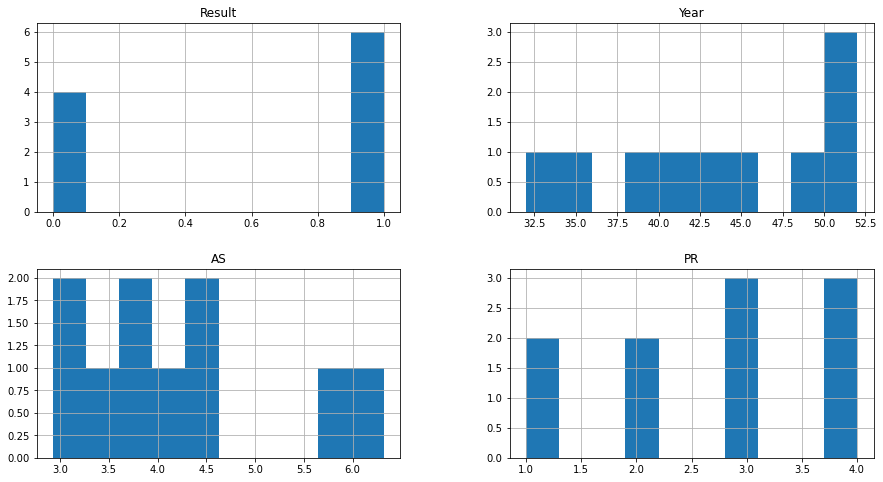

In [22]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df.hist(ax=ax)
plt.show

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


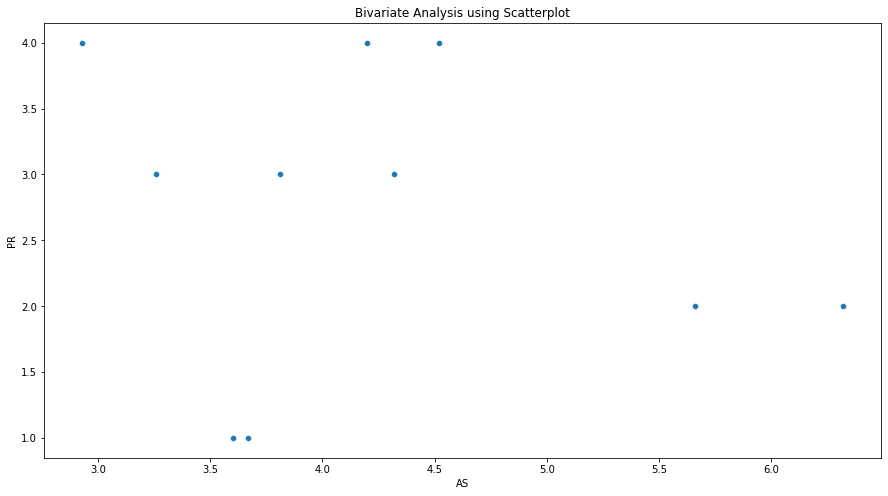

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['AS'],df['PR'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

__CORRELATION CHART__

<AxesSubplot:>

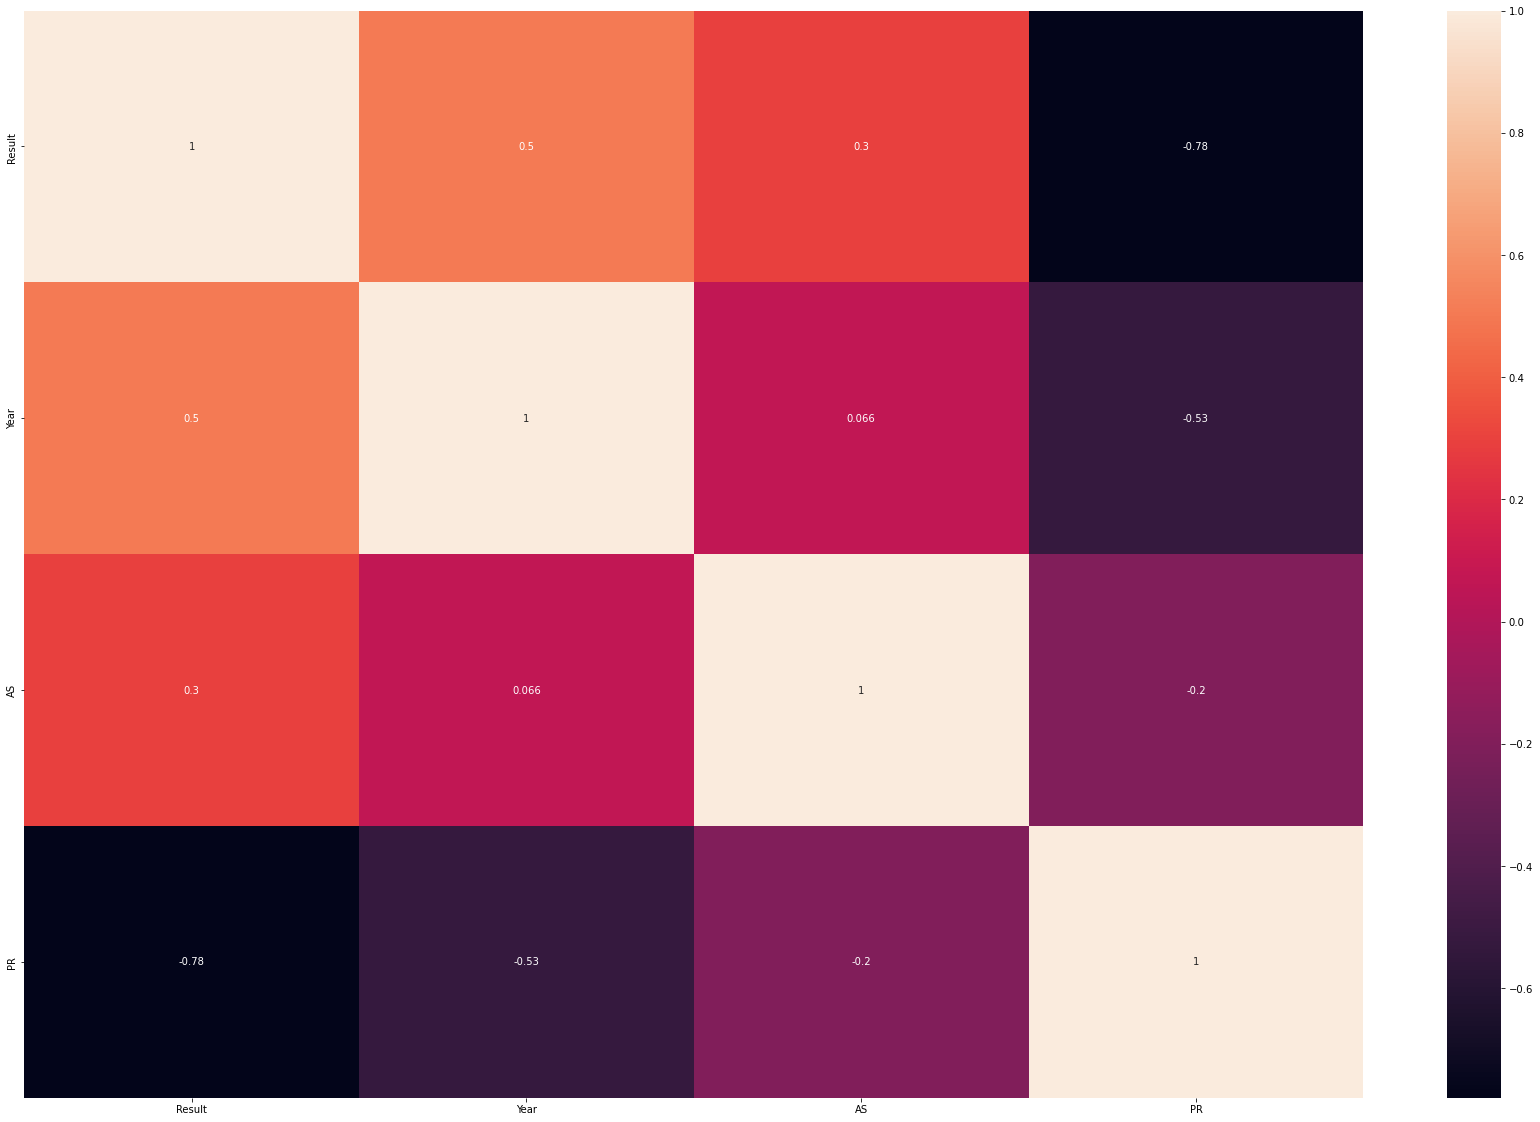

In [24]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

from the correlation chart it is clear that only PR has a comparatively strong negative relation with the output variable. 

#### MODEL BUILDING

Importing the library required for building the model. 

In [25]:
import statsmodels.formula.api as smf

__Logistic Regression__

Fitting the model

In [26]:
logit_model = smf.logit('Result ~ Year + AS + PR  ', data = df).fit()

C:\Users\lenny\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\lenny\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

The above error is happening because one variable is to similar to the output variable  and the dataset is also small.So dropping the PR variable to avoid the above error

Dropping the PR variable and again fitting the model. 

In [27]:
df.drop(['PR'],axis=1,inplace=True)

In [28]:
logit_model = smf.logit('Result ~ Year + AS  ', data = df).fit()

Optimization terminated successfully.
         Current function value: 0.490457
         Iterations 6


In [29]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            Pseudo R-squared: 0.271  
Dependent Variable: Result           AIC:              15.8091
Date:               2022-12-25 01:25 BIC:              16.7169
No. Observations:   10               Log-Likelihood:   -4.9046
Df Model:           2                LL-Null:          -6.7301
Df Residuals:       7                LLR p-value:      0.16113
Converged:          1.0000           Scale:            1.0000 
No. Iterations:     6.0000                                    
--------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------
Intercept     -10.9151   7.1830 -1.5196 0.1286 -24.9935 3.1633
Year            0.1892   0.1343  1.4084 0.1590  -0.0741 0.4525
AS              0.7839   0.9072  0.8641 0.3875  -0.9941 2.5620
==============================================================

"""

We will concentrate on the AIC value, the AIC value is small so will continue further. 

Loading the libraries required for getting the accuracy scores of the model. 

In [30]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

Predicting the values using the model. 

In [31]:
pred = logit_model.predict(df.iloc[ :, 1:])

From the sklearn library using roc_curve to find the fpr, tpr and thresholds to find the optimal threshold. 

In [32]:
# from sklearn import metrics
fpr, tpr, thresholds = roc_curve(df.Result, pred)
# Using the argmax to find the index which has the highest difference between the True Positive Rate and False Positive Rate. 
optimal_idx = np.argmax(tpr - fpr)
# Identifying the optimal threshold and saving it using the index value. 
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.49149948540657773

Importing the library required to create the ROC curve. 

In [33]:
import pylab as pl

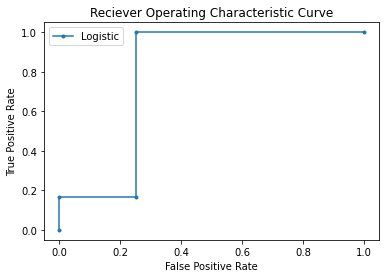

In [34]:
pl.plot(fpr,tpr, marker='.', label='Logistic');pl.xlabel('False Positive Rate');pl.ylabel('True Positive Rate');pl.title('Reciever Operating Characteristic Curve')
pl.legend()
pl.show()

Using the auc function to get the Area under the ROC Curve. 

In [35]:
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.791667


Getting the classification report after setting the optimal threshold value as the cutoff value and converting the predicted probabilities into the binary output. 

In [36]:
# filling all the cells with zeroes
df["pred"] = np.zeros(10)
# taking threshold value and above the prob value will be treated as correct value 
df.loc[pred > optimal_threshold, "pred"] = 1
# classification report
print(classification_report(y_pred=df["pred"], y_true=df["Result"]))

              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75         4
         1.0       0.83      0.83      0.83         6

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



Saving the classification report in a dataframe.

In [37]:
classification_report = pd.DataFrame(classification_report(y_pred =df["pred"], y_true =df["Result"], output_dict=True)).transpose()
classification_report

,precision,recall,f1-score,support
0.0,0.750000,0.750000,0.750000,4.0
1.0,0.833333,0.833333,0.833333,6.0
accuracy,0.800000,0.800000,0.800000,0.8
macro avg,0.791667,0.791667,0.791667,10.0
weighted avg,0.800000,0.800000,0.800000,10.0


### CONCLUSION

The dataset is too small to further split the dataset to train and test, so from the above details we can infer that using the logistic regression we can get close to 80% accuracy , which seems to be fair result.